### **1.	Data Cleaning**

**a.	Install Libraries**

In [1]:
# After changing kernel, install directly
%conda install numpy pandas matplotlib seaborn scikit-learn tensorflow pytorch scikit-learn jupyter -y

3 channel Terms of Service accepted
Channels:
 - defaults
Platform: win-64
Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.




==> WARNING: A newer version of conda exists. <==
    current version: 25.5.1
    latest version: 26.1.0

Please update conda by running

    $ conda update -n base -c defaults conda




**b.	Import Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**c.	Load Dataset (Seaborn Library or Local Directory)**

In [3]:
df = sns.load_dataset('titanic')

# Alternative if loading from CSV
# df = pd.load_dataset('titanic.csv')

# Alternative if loading from JSON
# df = pd.json('titanic.json')

# Alternative if loading from Excel
# df = pd.read_excel('titanic.xlsx') 

# Alternative if loading from SQL
# df = pd.read_sql('SELECT * FROM titanic_table', connection)

**d.	Display first 5 rows of the dataset**

In [4]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


#### **1.1.	Exploring/Identifying Missing Values in the Dataset**

**a.	Method 1: Missing Values Analysis**

In [5]:
# df.isnull().sum()
df.isnull().sum().sort_values(ascending=False)

deck           688
age            177
embarked         2
embark_town      2
sex              0
pclass           0
survived         0
fare             0
parch            0
sibsp            0
class            0
adult_male       0
who              0
alive            0
alone            0
dtype: int64

**b.	Method 2: Percentage of missing values**

In [6]:
# df.isnull().mean() * 100

# df.isnull().sum() / len(df) * 100

# (df.isnull().sum() / len(df) * 100).sort_values(ascending=False)

(df.isnull().sum() / len(df) * 100).round(2).sort_values(ascending=False)

deck           77.22
age            19.87
embarked        0.22
embark_town     0.22
sex             0.00
pclass          0.00
survived        0.00
fare            0.00
parch           0.00
sibsp           0.00
class           0.00
adult_male      0.00
who             0.00
alive           0.00
alone           0.00
dtype: float64

**c.	Method 3: Visualizing Missing Values**

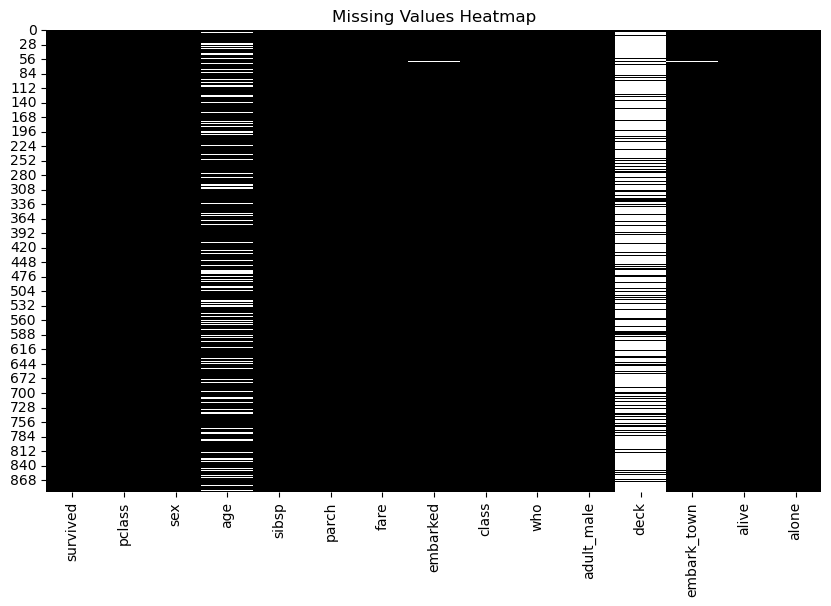

In [7]:
from matplotlib.colors import ListedColormap
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap=ListedColormap(['black', 'white']))
plt.title('Missing Values Heatmap')
plt.show()

**d.	Method 4: DataFrame Info Missing Values Summary**

In [8]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    str     
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    str     
 8   class        891 non-null    category
 9   who          891 non-null    str     
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    str     
 13  alive        891 non-null    str     
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), str(5)
memory usage: 80.7 KB


#### **1.3.	How to Identify Missing Values?**

**● Missingno Library**

In [9]:
# Install missingno if not already installed
%conda install missingno -y

3 channel Terms of Service accepted
Channels:
 - defaults
Platform: win-64
Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.




==> WARNING: A newer version of conda exists. <==
    current version: 25.5.1
    latest version: 26.1.0

Please update conda by running

    $ conda update -n base -c defaults conda




<Figure size 1000x600 with 0 Axes>

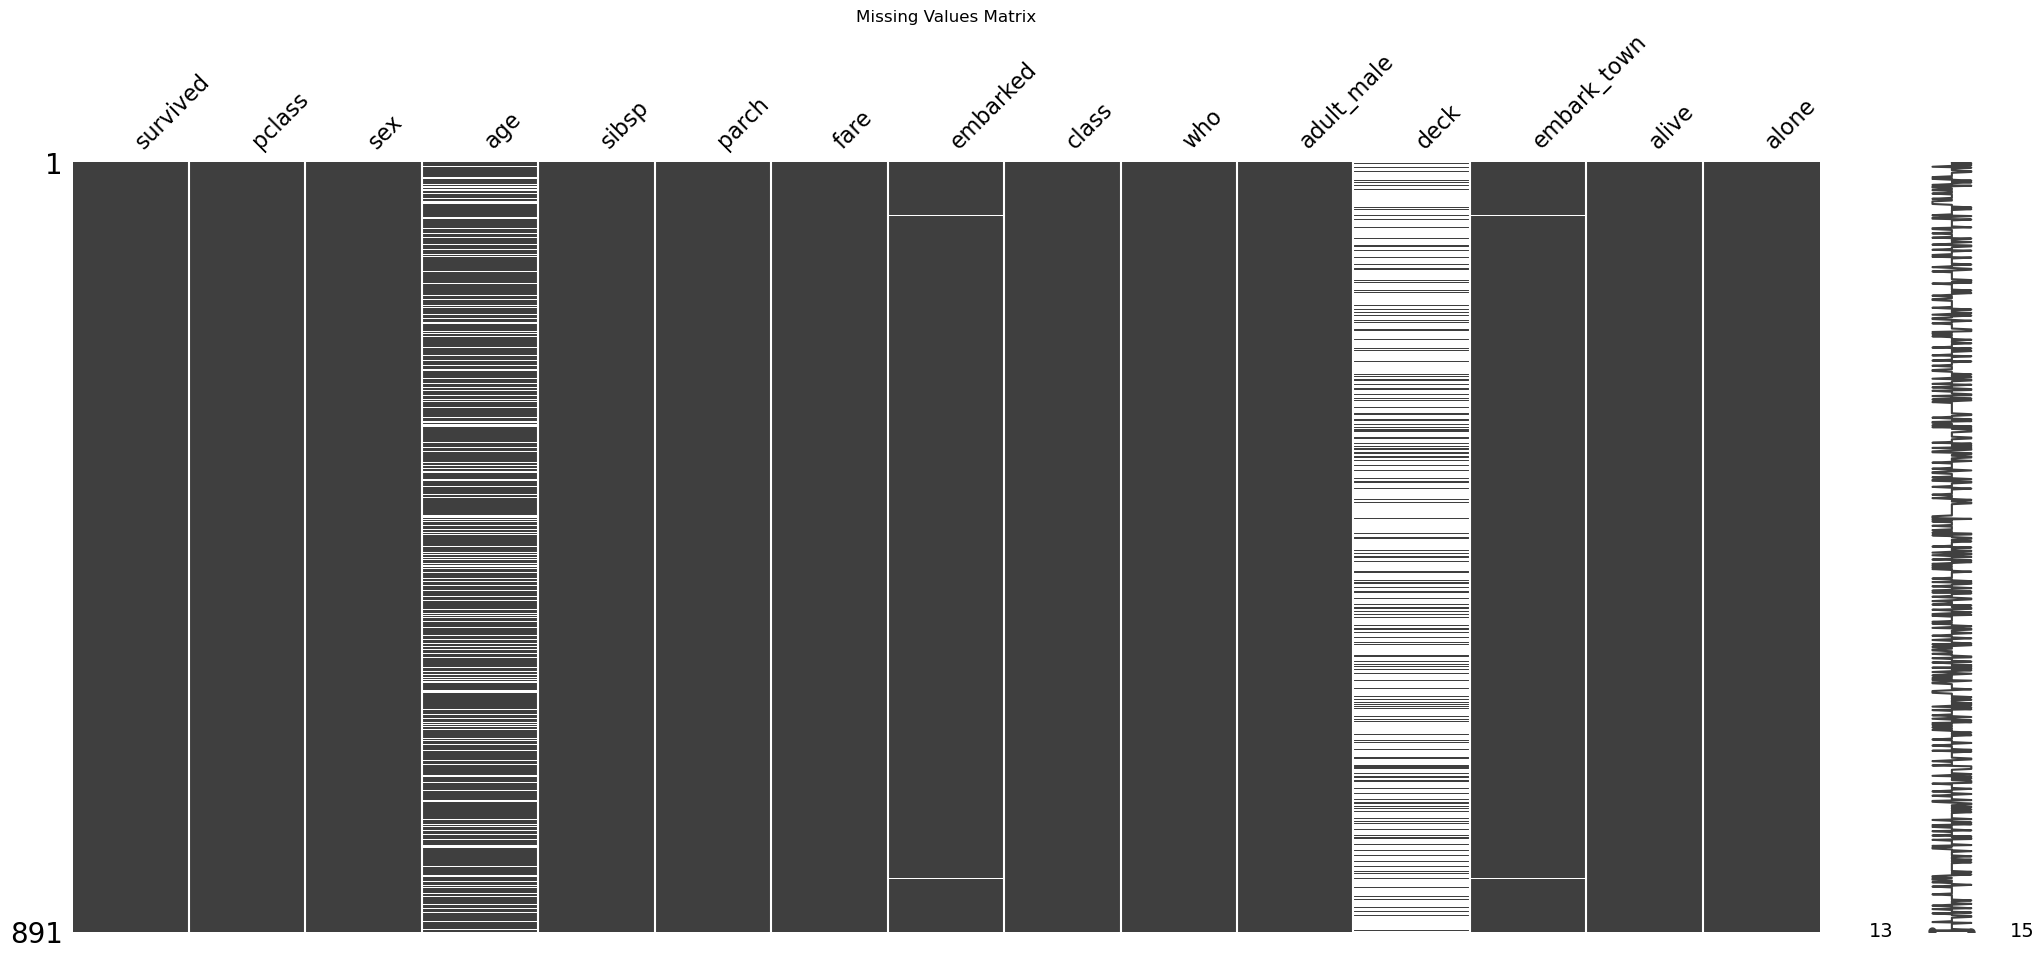

In [10]:
import missingno as msno
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))  # Set figure size
msno.matrix(df)
plt.title('Missing Values Matrix')
plt.show()

#### **1.8.	Dealing/Impute Missing Values Using Pandas Library**

**● Calculate median for age column**

In [11]:
df['age'].median()

np.float64(28.0)

**● Calculate the mean for age column, median is less affected by outliers as compared to mean**

In [12]:
df['age'].mean().round(2)

np.float64(29.7)

**● Mean or Median Imputation to fill age column missing values using pandas**

In [13]:
# df['age'].fillna(df['age'].mean(), inplace=True)  # Mean

df['age'].fillna(df['age'].median(), inplace=True)  # Median

# Missing Values Analysis
df.isnull().sum().sort_values(ascending=False)

C:\Users\Admin\AppData\Local\Temp\ipykernel_10700\1841202331.py:3: ChainedAssignmentError: A value is being set on a copy of a DataFrame or Series through chained assignment using an inplace method.
Such inplace method never works to update the original DataFrame or Series, because the intermediate object on which we are setting values always behaves as a copy (due to Copy-on-Write).

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' instead, to perform the operation inplace on the original object, or try to avoid an inplace operation using 'df[col] = df[col].method(value)'.

See the documentation for a more detailed explanation: https://pandas.pydata.org/pandas-docs/stable/user_guide/copy_on_write.html
  df['age'].fillna(df['age'].median(), inplace=True)  # Median


deck           688
age            177
embarked         2
embark_town      2
sex              0
pclass           0
survived         0
fare             0
parch            0
sibsp            0
class            0
adult_male       0
who              0
alive            0
alone            0
dtype: int64

**● Drop or remove the duck column with high missing values**

In [14]:
df.drop('deck', axis=1, inplace=True) # axis=0 for rows, axis=1 for columns, inplace=True to modify the original dataframe

# Missing Values Analysis
df.isnull().sum().sort_values(ascending=False)

age            177
embarked         2
embark_town      2
sex              0
pclass           0
survived         0
parch            0
sibsp            0
class            0
fare             0
who              0
adult_male       0
alive            0
alone            0
dtype: int64

**● Calculate mod for embarked column**

In [15]:
df['embarked'].mode()[0]

'S'

**● Calculate mod for embark_town column**

In [16]:
df['embark_town'].mode()[0]

'Southampton'

**● Value counts for embarked columns**

In [17]:
df['embarked'].value_counts() 

embarked
S    644
C    168
Q     77
Name: count, dtype: int64

**● embarked and embark_town are categorical columns with few missing values, we can use Mode Imputation to fill missing values**

In [18]:
# Mode Imputation to fill embarked missing values using pandas
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)  # Mode Imputation

# Mode Imputation to fill embark_town missing values using pandas
df['embark_town'].fillna(df['embark_town'].mode()[0], inplace=True)  # Mode Imputation

# Missing Values Analysis
df.isnull().sum().sort_values(ascending=False)

C:\Users\Admin\AppData\Local\Temp\ipykernel_10700\728270622.py:2: ChainedAssignmentError: A value is being set on a copy of a DataFrame or Series through chained assignment using an inplace method.
Such inplace method never works to update the original DataFrame or Series, because the intermediate object on which we are setting values always behaves as a copy (due to Copy-on-Write).

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' instead, to perform the operation inplace on the original object, or try to avoid an inplace operation using 'df[col] = df[col].method(value)'.

See the documentation for a more detailed explanation: https://pandas.pydata.org/pandas-docs/stable/user_guide/copy_on_write.html
  df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)  # Mode Imputation
C:\Users\Admin\AppData\Local\Temp\ipykernel_10700\728270622.py:5: ChainedAssignmentError: A value is being set on a copy of a DataFrame or Ser

age            177
embarked         2
embark_town      2
sex              0
pclass           0
survived         0
parch            0
sibsp            0
class            0
fare             0
who              0
adult_male       0
alive            0
alone            0
dtype: int64

**● Using dropna method to remove rows with missing values in embarked column**

In [19]:
dna = sns.load_dataset('titanic')
dna.dropna(subset=['embarked'], inplace=True)

# Missing Values Analysis
dna.isnull().sum().sort_values(ascending=False)

deck           688
age            177
pclass           0
sex              0
sibsp            0
parch            0
survived         0
fare             0
embarked         0
who              0
class            0
adult_male       0
embark_town      0
alive            0
alone            0
dtype: int64

#### **1.9.	Imputer age column missing values using forward fill method using pandas**

In [20]:
# Load dataset
ff = sns.load_dataset('titanic')

# Forward fill missing values in 'age' column (safe way)
ff['age'] = ff['age'].ffill()

# Missing values analysis
ff.isnull().sum().sort_values(ascending=False)

deck           688
embarked         2
embark_town      2
age              0
survived         0
pclass           0
sex              0
fare             0
parch            0
sibsp            0
class            0
adult_male       0
who              0
alive            0
alone            0
dtype: int64

#### **1.10.	Imputer age column missing values using backward fill method using pandas**

In [21]:
# Load dataset
bf = sns.load_dataset('titanic')

# Backward fill missing values in 'age' column (safe way)
bf['age'] = ff['age'].bfill()

# Missing values analysis
bf.isnull().sum().sort_values(ascending=False)

deck           688
embarked         2
embark_town      2
age              0
survived         0
pclass           0
sex              0
fare             0
parch            0
sibsp            0
class            0
adult_male       0
who              0
alive            0
alone            0
dtype: int64

#### **1.11.	Imputation of Missing Values Using scikit-learn Library**

In [22]:
import numpy
import scipy
import sklearn

print(numpy.__version__)
print(scipy.__version__)
print(sklearn.__version__)

2.1.3
1.16.3
1.8.0


**● Import SimpleImputer from sklearn.impute**

In [23]:
from sklearn.impute import SimpleImputer

##### **1.11.1.	Univariate Feature Imputation (SimpleImputer)**

In [24]:
# Load Dataset
si = sns.load_dataset('titanic')

# Impute age column missing values using SimpleImputer with Median strategy
imputer = SimpleImputer(strategy='median')
si['age'] = imputer.fit_transform(si[['age']])

# Missing Values Analysis
si.isnull().sum().sort_values(ascending=False)

deck           688
embarked         2
embark_town      2
age              0
survived         0
pclass           0
sex              0
fare             0
parch            0
sibsp            0
class            0
adult_male       0
who              0
alive            0
alone            0
dtype: int64

##### **1.11.2.	Multivariate Feature Imputation (IterativeImputer)**

In [25]:
# Load Dataset
ii = sns.load_dataset('titanic')

# Enable IterativeImputer from experimental module
from sklearn.experimental import enable_iterative_imputer

# Impute age column missing values using IterativeImputer with Median strategy
from sklearn.impute import IterativeImputer

imputer = IterativeImputer()
# imputer = IterativeImputer(max_iter=10, random_state=0, n_nearest_features=5)
ii['age'] = imputer.fit_transform(ii[['age']])

# Missing Values Analysis
ii.isnull().sum().sort_values(ascending=False)

deck           688
embarked         2
embark_town      2
age              0
survived         0
pclass           0
sex              0
fare             0
parch            0
sibsp            0
class            0
adult_male       0
who              0
alive            0
alone            0
dtype: int64

##### **1.11.3.	Nearest Neighbors Imputation (KNNImputer)**

In [26]:
# Load Dataset
knni = sns.load_dataset('titanic')

# Impute age column missing values using KNNImputer
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5, weights='uniform')
knni['age'] = imputer.fit_transform(knni[['age']])

# Missing Values Analysis
knni.isnull().sum().sort_values(ascending=False)

deck           688
embarked         2
embark_town      2
age              0
survived         0
pclass           0
sex              0
fare             0
parch            0
sibsp            0
class            0
adult_male       0
who              0
alive            0
alone            0
dtype: int64

##### **1.11.4.	Marking Imputed Values (SimpleImputer, MissingIndicator)**


In [27]:
from sklearn.impute import MissingIndicator, SimpleImputer

# Load dataset
mi = sns.load_dataset('titanic')

# Create MissingIndicator object
indicator = MissingIndicator(features='missing-only')

# Find where values are missing
missing_mask = indicator.fit_transform(mi[['age']])

In [28]:
# Impute missing age values using median
imputer = SimpleImputer(strategy='median')
mi['age'] = imputer.fit_transform(mi[['age']])

# Check remaining missing values
mi.isnull().sum().sort_values(ascending=False)

deck           688
embarked         2
embark_town      2
age              0
survived         0
pclass           0
sex              0
fare             0
parch            0
sibsp            0
class            0
adult_male       0
who              0
alive            0
alone            0
dtype: int64